#Problem 5: Binary Morphology

#Problem 5.1

In [ ]:
import numpy 
import cv2 # used only for image read and write
from google.colab.patches import cv2_imshow

In [ ]:
# s= size, k=kernel 

s = 20
# Structuring Element along with the size 
k = numpy.ones((s, s), numpy.uint8)
# padding size
p_s = s//2
# reading of the image 
I = cv2.imread('/content/drive/MyDrive/D22180_HW_3/s1.png', 0)
# getting size of image
r = I.shape[0]
c = I.shape[1]

DILATION OPERATION

In [ ]:
print("Dilation operation")
def DILATE(P_Image, s):
    DILATE_O = numpy.zeros((r, c), dtype=numpy.uint8) # DILATE_O= output
    for i in range(0, r):
        for j in range(0, c):
            # Slicing
            p = P_Image[i:i+s, j:j+s] #p = portion 
            p1 = p.flatten()
            # if Hit Condition Satisfies
            if 255 in p1:
                DILATE_O[i, j] = 255
            else:
                DILATE_O[i, j] = numpy.max(p1)
    return DILATE_O

Dilation operation


In [ ]:
print("padding of image") # P_I = padded image
def P_I(I, padSize):
    P_Image = numpy.zeros((r+2*padSize, c+2*padSize), dtype=numpy.uint8)
    # using Slicing
    P_Image[padSize:r+padSize, padSize:c+padSize] = I
    return P_Image

padding of image


EROSION OPERATION

In [ ]:
print("Erosrion function")
def EROSION_OP(P_Image, k, s):
    EROSION_O = numpy.zeros((r, c), dtype=numpy.uint8)
    for i in range(0, r):
        for j in range(0, c):
            # Slicing
            p = P_Image[i:i+s, j:j+s]
            p1 = p.flatten()
            p2 = k.flatten()
            # sum of kernel and window
            p11 = (numpy.sum(p1))
            p22 = (numpy.sum(p2))*255
            # if Fit condition satisfies
            if p11 == p22:
                EROSION_O[i, j] = 255
            else:
                EROSION_O[i, j] = numpy.min(p1)
    return EROSION_O

Erosrion function


original Image


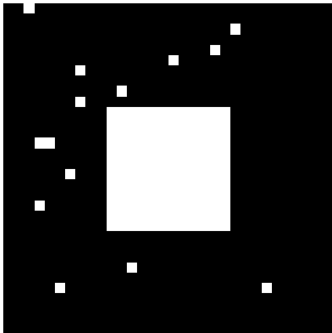

Dilatted Image


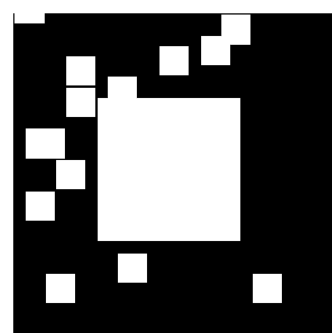

erode image show


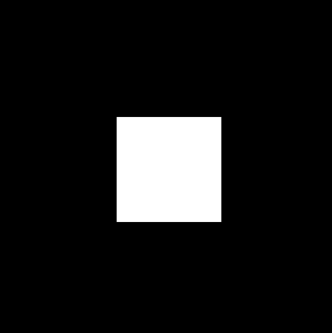

In [ ]:
#  calling the padding function
P_Image = P_I(I, p_s)
#Dilation  operation
DILATE_I = DILATE(P_Image, s)
#  Erosion operation
ERODE_I = EROSION_OP(P_Image, k, s)
print("original Image")
cv2_imshow(I)

print("Dilatted Image")
cv2_imshow(DILATE_I)

print("erode image show") 
cv2_imshow( ERODE_I)

#PROBLEM 5.2

#Step 1:Complement of Image

original Image


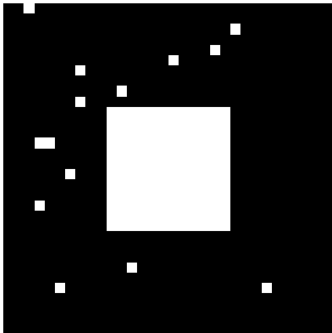

In [ ]:
print("original Image")
cv2_imshow(I)

Complement of Original image


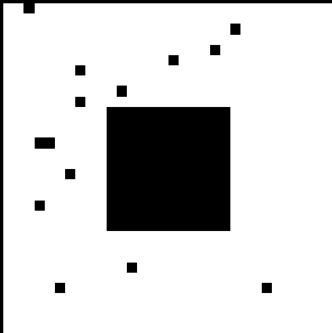

In [ ]:
print("Complement of Original image")
complemented_image_orginalImg = 255 - I
cv2_imshow(complemented_image_orginalImg)

In [ ]:
#Save image
import os
directory = r'/content/drive/MyDrive/D22180_HW_3'
img = complemented_image_orginalImg
os.chdir(directory)
print(os.listdir(directory))  
filename = 'Complement_E.jpg'
cv2.imwrite(filename, img)

['D22180_HW_3_4.ipynb', '1.png', '2.png', 'lena.jpg', 'fg1.jpg', 'triangle.png', 'ch.jpg', 's1.png', ' D22180_HW_3.ipynb', 'D22180_HW_3_1.ipynb', 'Copy of Copy of D22180_HW_3new.ipynb', '  D22180_HW_3_3.ipynb', ' D22180_HW_3_2.ipynb', 'savedImage.jpg', 'Complement_s1.jpg', 'Complement_B.jpg']


True

#step2 :Performing Erode opration

In [ ]:
# s= size, k=kernel 

s = 20
# Structuring Element along with the size 
k = numpy.ones((s, s), numpy.uint8)
# padding size
p_s = s//2
# reading of the image 
E = cv2.imread('/content/drive/MyDrive/D22180_HW_3/Complement_E.jpg', 0)
# getting size of image
r = E.shape[0]
c = E.shape[1]

erode image show


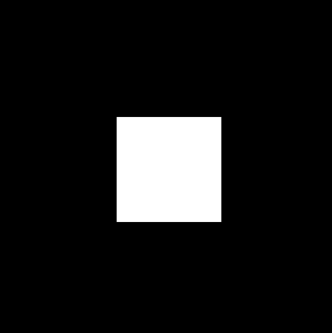

In [ ]:
#  Erosion operation
ERODE_I = EROSION_OP(P_Image, k, s)
print("erode image show") 
cv2_imshow( ERODE_I)

In [ ]:
#Save image
import os
directory = r'/content/drive/MyDrive/D22180_HW_3'
img =ERODE_I
os.chdir(directory)
print(os.listdir(directory))  
filename = 'E_Image.jpg'
cv2.imwrite(filename, img)

['D22180_HW_3_4.ipynb', '1.png', '2.png', 'lena.jpg', 'fg1.jpg', 'triangle.png', 'ch.jpg', 's1.png', ' D22180_HW_3.ipynb', 'D22180_HW_3_1.ipynb', 'Copy of Copy of D22180_HW_3new.ipynb', '  D22180_HW_3_3.ipynb', ' D22180_HW_3_2.ipynb', 'savedImage.jpg', 'Complement_s1.jpg', 'Complement_B.jpg', 'Complement_E.jpg']


True

#Step3: Again performing complement operation

Complement of Original image


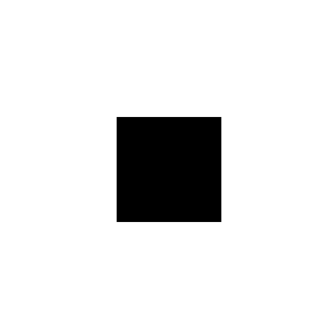

In [ ]:
print("Complement of Original image")
complemented_image_Erode = 255 - ERODE_I
cv2_imshow(complemented_image_Erode)

#Step4: Dilation operation applied on erodded complement image


In [ ]:
# s= size, k=kernel 

s = 20
# Structuring Element along with the size 
k = numpy.ones((s, s), numpy.uint8)
# padding size
p_s = s//2
# reading of the image 
D = cv2.imread('/content/drive/MyDrive/D22180_HW_3/E_Image.jpg', 0)
# getting size of image
r = D.shape[0]
c = D.shape[1]

Dilatted Image


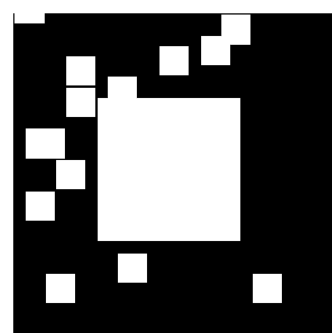

In [ ]:
#Dilation  operation
DILATE_I = DILATE(P_Image, s)
print("Dilatted Image")
cv2_imshow(DILATE_I)


#HANCE PROOVED:)

#PROBLEM 5.3

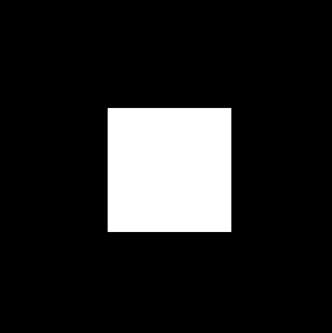

In [ ]:
def OPEN(P_Image, K, S):
    # First apply Erosion
    ERODE_I = EROSION_OP(P_Image, k, s)
    P_I2 = P_I(ERODE_I, s//2)
    # secondly apply Dilation on Eroded
    OPEN_O = DILATE(P_I2, s)
    return OPEN_O

P_I2 = P_I(open, p_s)
# First apply opening to remove small objects
open = OPEN(P_Image, k, s)
cv2_imshow(open)

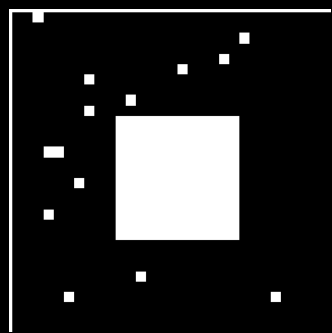

In [ ]:
def CLOSE(P_Image,k, s):
    # First apply Dilation
    DILATE_I = DILATE(P_Image, s)
    P_I3 = P_I(DILATE_I, s//2)
    # secondly apply Erosion on Dilated
    Erod = EROSION_OP(P_I3, k, s)
    return Erod
P_I3 = P_I(open, p_s)
# Then apply closing to remove gaps
close = CLOSE(P_Image, k, 3)
cv2_imshow( close)

#Problem 5.4

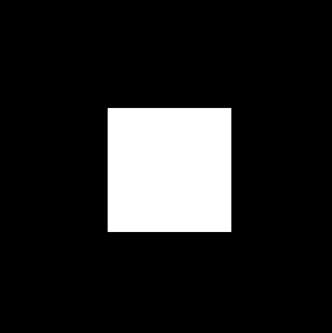

In [ ]:
def OPEN_CLOS(P_Image, K, S):
    # First apply Closeoperation
    ERODE_I = EROSION_OP(P_Image, k, s)
    P_I2 = P_I(ERODE_I, s//2)
    # secondly apply Dilation on Eroded
    open = OPEN(P_Image, k, s)
    return open

P_I2 = P_I(open, p_s)
# First apply opening to remove small objects
open_close = OPEN_CLOS(P_Image, k, s)
cv2_imshow(open_close)

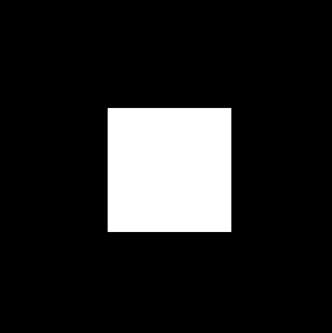

In [ ]:
def CLOS_OPEN(P_Image, K, S):
    # First apply OPEN OPERATION
    open = OPEN(P_Image, k, s)
    P_I2 = P_I(open, s//2)
    # secondly apply close operation
    close = CLOSE(P_Image, k, 3)
    return close

P_I2 = P_I(open, p_s)
# First apply opening to remove small objects
close_open = OPEN_CLOS(P_Image, k, s)
cv2_imshow(close_open)

#Median operation

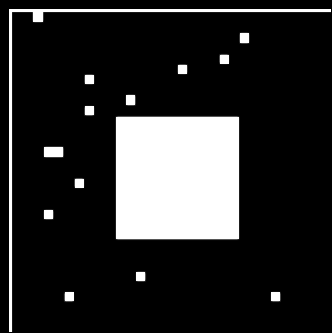

In [76]:
def MEDIAN(P_Image,k, s):
    # First apply Dilation
    DILATE_I = DILATE(P_Image, s)
    P_I3 = P_I(DILATE_I, s//2)
    # secondly apply Erosion on Dilated
    Erod = EROSION_OP(P_I3, k, s)
    return Erod
P_I3 = P_I(open, p_s)
# Then apply closing to remove gaps
Median = MEDIAN(P_Image, k, 3)
cv2_imshow( Median)